In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from google.colab import drive


drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Reference:
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e


Dataset:
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

In [ ]:
# df = pd.read_csv("/content/gdrive/MyDrive/Diabetes Project/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df = pd.read_csv("/content/gdrive/MyDrive/Diabetes Project/2015.csv")
# df =pd.read_csv("/content/sample_data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
# print(df.head())
# print(df.shape)
df.describe()

# print(df.groupby(['HvyAlcoholConsump']).size())

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
count,441456.000000,441456.000000,441456.000000,4.414560e+05,4.414560e+05,254645.0,254645.000000,45.0,254643.0,254646.000000,...,441456.000000,441456.000000,438657.000000,438657.000000,438657.000000,441456.000000,441456.000000,157954.000000,157954.000000,398069.000000
mean,29.968715,6.359676,1115.040457,2.015005e+09,2.015005e+09,1.0,1.000177,1.0,1.0,1.545133,...,3.494124,2.742695,2.716879,2.815149,3.652717,1.824624,1.887028,2.290705,2.412259,1.970156
std,16.034710,3.487131,35.746794,4.113443e+03,4.113443e+03,0.0,0.013292,0.0,0.0,0.497960,...,2.398322,2.449676,1.324145,1.356101,1.266730,2.360812,2.351387,2.518086,2.778032,1.441119
min,1.000000,1.000000,1100.000000,2.015000e+09,2.015000e+09,1.0,1.000000,1.0,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,1100.000000,2.015002e+09,2.015002e+09,1.0,1.000000,1.0,1.0,1.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,29.000000,6.000000,1100.000000,2.015004e+09,2.015004e+09,1.0,1.000000,1.0,1.0,2.000000,...,3.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,44.000000,9.000000,1100.000000,2.015007e+09,2.015007e+09,1.0,1.000000,1.0,1.0,2.000000,...,4.000000,2.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,72.000000,12.000000,1200.000000,2.015023e+09,2.015023e+09,1.0,2.000000,1.0,1.0,2.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [ ]:
X = df.iloc[:,2:23]  #independent columns
y = df['Diabetes_binary']    #target column i.e price range


#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh')
plt.show()

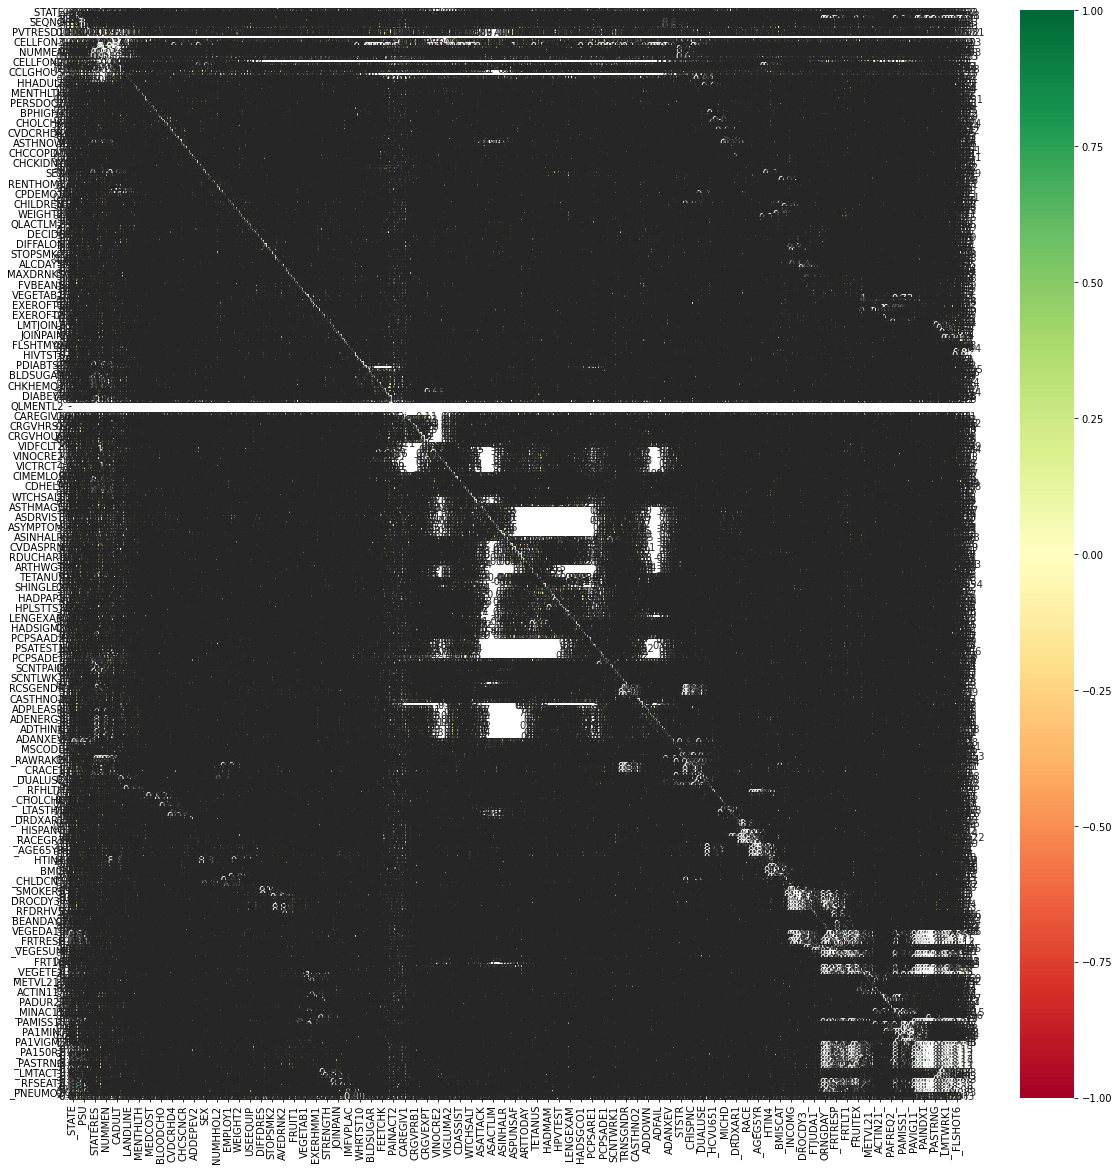

In [ ]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
# print(corrmat)
plt.figure(figsize=(20,20))
# plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# plt.figure(figsize=(300,300))
# # plot heat map
# g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")